In [1]:
# Question 1 - Import and Explore Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import metrics, linear_model, svm
from sklearn.model_selection import train_test_split

os.chdir('C:\\Users\\micha\\Documents\\DAAN862')

df = pd.read_csv('breastcancer.csv')
display(df)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [2]:
# Question 1 Cont - Explore data
display(df.describe())
display(df.corr())

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.000000,0.008530,0.230106,0.032495,0.127033,0.102626,-0.219813,0.002742,0.013462,-0.043555
BMI,0.008530,1.000000,0.138845,0.145295,0.114480,0.569593,-0.302735,0.195350,0.224038,-0.132586
Glucose,0.230106,0.138845,1.000000,0.504653,0.696212,0.305080,-0.122121,0.291327,0.264879,0.384315
Insulin,0.032495,0.145295,0.504653,1.000000,0.932198,0.301462,-0.031296,0.146731,0.174356,0.276804
HOMA,0.127033,0.114480,0.696212,0.932198,1.000000,0.327210,-0.056337,0.231101,0.259529,0.284012
Leptin,0.102626,0.569593,0.305080,0.301462,0.327210,1.000000,-0.095389,0.256234,0.014009,-0.001078
Adiponectin,-0.219813,-0.302735,-0.122121,-0.031296,-0.056337,-0.095389,1.000000,-0.252363,-0.200694,-0.019490
Resistin,0.002742,0.195350,0.291327,0.146731,0.231101,0.256234,-0.252363,1.000000,0.366474,0.227310
MCP.1,0.013462,0.224038,0.264879,0.174356,0.259529,0.014009,-0.200694,0.366474,1.000000,0.091381
Classification,-0.043555,-0.132586,0.384315,0.276804,0.284012,-0.001078,-0.019490,0.227310,0.091381,1.000000


In [3]:
# Question 2 - Build and Evaluate SVM Models

# Start with splitting data
X = df.iloc[:, 0:9]
y = df.Classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Start with Linear SVM
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [5]:
# Find coefs of SVM
print(svm_linear.coef0)

print(svm_linear.coef_)

0.0
[[-0.02584147 -0.08217591  0.10106202  0.11505145 -0.22113645 -0.01446274
  -0.02750599  0.0050329   0.0007635 ]]


In [6]:
# Get accuracy of Linear SVM
svm_linear_pred = svm_linear.predict(X_test)

metrics.accuracy_score(y_test, svm_linear_pred)

0.7714285714285715

In [7]:
# Build rbf SVM
svm_rbf = svm.SVC(kernel='rbf', gamma=0.1)

svm_rbf.fit(X_train, y_train)

SVC(gamma=0.1)

In [8]:
# Evaluate
svm_rbf_pred = svm_rbf.predict(X_test)

metrics.accuracy_score(y_test, svm_rbf_pred)

0.5142857142857142

In [9]:
# Build Poly SVM
svm_poly = svm.SVC(kernel='poly', degree=3)

svm_poly.fit(X_train, y_train)

SVC(kernel='poly')

In [10]:
# Evaluate
svm_poly_pred = svm_poly.predict(X_test)

metrics.accuracy_score(y_test, svm_poly_pred)

# We can see that betwen the three SVMs used, Linear provided the best accuracy

0.5142857142857142

In [11]:
# Question 3 - Find the best n-estimator of RBF Model
from sklearn.ensemble import RandomForestClassifier

#Start by building and evaluting RBF with n=100
RF = RandomForestClassifier(n_estimators=100, random_state=42)

RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Evaluate
RF_pred = RF.predict(X_test)

metrics.accuracy_score(y_test, RF_pred)

0.7142857142857143

In [13]:
# Test to see which values have the most importance to model
pd.DataFrame({'feature':df.columns[0:9],
             'importance':RF.feature_importances_})

,feature,importance
0,Age,0.167139
1,BMI,0.070999
2,Glucose,0.265373
3,Insulin,0.067388
4,HOMA,0.111275
5,Leptin,0.089793
6,Adiponectin,0.069396
7,Resistin,0.079909
8,MCP.1,0.078728


In [49]:
# One way of determing the best number of n-estimator is to 
# loop through each value and analyze the performance
from sklearn.model_selection import cross_val_score

n_estimator = range(1, 100)

accuracy = []

for i in n_estimator:
    RF = RandomForestClassifier(n_estimators=i, random_state=10)
    scores = cross_val_score(RF, X_train, y_train)
    accuracy.append(scores.mean())


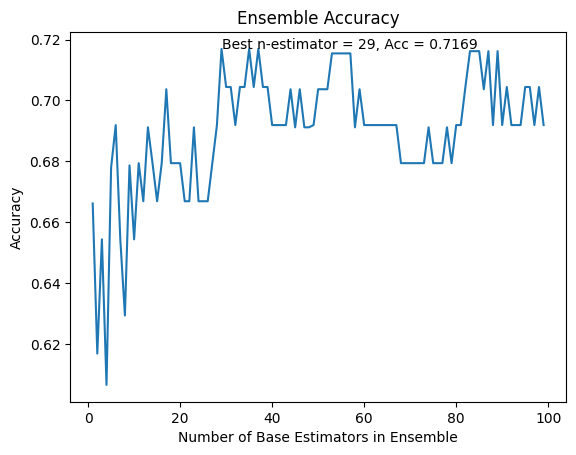

In [34]:
# We can plot each accuracy in relation to its n-value
plt.figure()
plt.plot(n_estimator, accuracy)
plt.title('Ensemble Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Base Estimators in Ensemble')

ymax = max(accuracy)
xpos = accuracy.index(ymax)
xmax = n_estimator[xpos]
text = 'Best n-estimator = {:.0f}, Acc = {:.4f}'.format(xmax, ymax)
plt.annotate(text, xy=(xmax, ymax))

plt.show()

# As shown, n-estimators of 29 (along with a few other values) can 
# give us the best accuracy

In [30]:
# Alternatively, we can implement GridSearchCV
from sklearn.model_selection import GridSearchCV

n_estimator_params = {'n_estimators':range(1, 100)}

RF_opt = GridSearchCV(RF, n_estimator_params)

In [31]:
RF_opt.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=98, random_state=10),
             param_grid={'n_estimators': range(1, 100)})

In [32]:
# Get the best value from optimized model
RF_opt.best_params_

# It matches what we saw in our previous method

{'n_estimators': 29}

In [36]:
# Re-evaluate the accuracy with the optimal param again.
RF_opt_pred = RF_opt.predict(X_test)

metrics.accuracy_score(y_test, RF_opt_pred)

# We went from an accuracy of 0.714 to 0.771 with optimized model

0.7714285714285715

In [55]:
# Question 4 - Find the best n-estimator for Adaboost

# We can implement the same methods used in Question 3, this time we
# can start with GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

# Some slight expiermentation was done with learning_rate here, too low of
# a value was initially given where all accuracies were the same independent
# of n_estimators
Ada = AdaBoostClassifier(n_estimators=50, learning_rate=0.5, random_state=42)

Ada_opt = GridSearchCV(Ada, n_estimator_params)
Ada_opt.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(learning_rate=0.5, random_state=42),
             param_grid={'n_estimators': range(1, 100)})

In [56]:
# Call the best param found
Ada_opt.best_params_

# 15 for n is noted as the best values

{'n_estimators': 15}

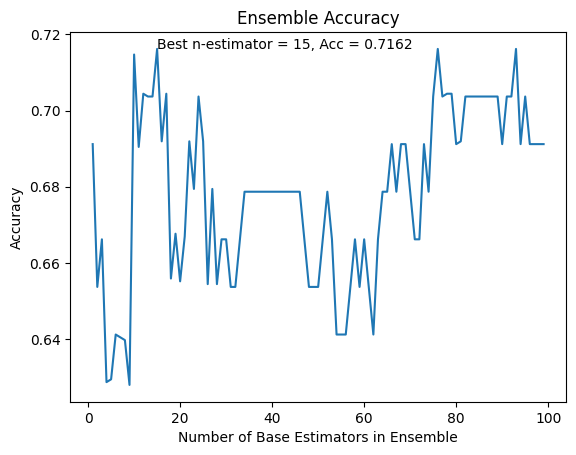

In [54]:
# We can verify the above results by using the same plot methodology as
# shown in Question 3

accuracy = []

for i in n_estimator:
    Ada_plot = AdaBoostClassifier(n_estimators=i, learning_rate=0.5, random_state=42)
    scores = cross_val_score(Ada_plot, X_train, y_train)
    accuracy.append(scores.mean())

plt.figure()
plt.plot(n_estimator, accuracy)
plt.title('Ensemble Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Base Estimators in Ensemble')

ymax = max(accuracy)
xpos = accuracy.index(ymax)
xmax = n_estimator[xpos]
text = 'Best n-estimator = {:.0f}, Acc = {:.4f}'.format(xmax, ymax)
plt.annotate(text, xy=(xmax, ymax))

plt.show()